c:\Users\essam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

InvalidIndexError: (slice(None, None, None), None)

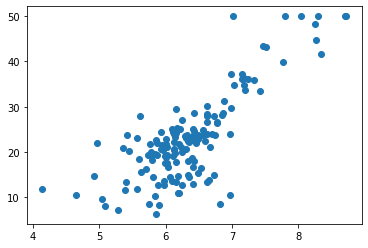

In [15]:
model = LinearRegression()
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
X = boston[['RM']]
Y = boston['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

model.fit(X_train, Y_train)

y_test_predicted = model.predict(X_test)

plt.scatter(X_test, Y_test,
label='testing data');
plt.plot(X_test, y_test_predicted,
label='prediction', linewidth=3)
plt.xlabel('RM'); plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.savefig("plot.png")
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

model = LinearRegression()
california_housing_dataset = fetch_california_housing()

## build a DataFrame
california_housing = pd.DataFrame(california_housing_dataset.data, columns=california_housing_dataset.feature_names)

#We then add the target into the DataFrame
california_housing['MEDV'] = california_housing_dataset.target

X = california_housing[['MedInc']]

Y = california_housing['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

model.fit(X_train, Y_train)

y_test_predicted = model.predict(X_test)



InvalidIndexError: (slice(None, None, None), None)

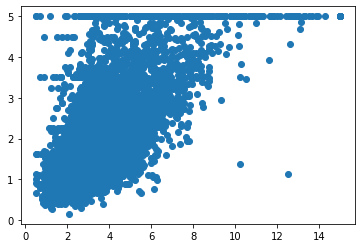

In [ ]:

plt.scatter(X_test, Y_test,
label='testing data');

plt.plot(X_test, y_test_predicted,
label='prediction', linewidth=3)

plt.xlabel('MedInc'); plt.ylabel('MEDV')

plt.legend(loc='upper left')
plt.savefig("plot.png")
plt.show()

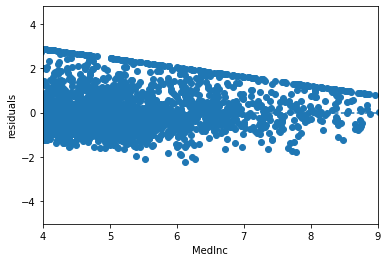

In [18]:
residuals = Y_test - y_test_predicted

# plot the residuals
plt.scatter(X_test, residuals)
# plot a horizontal line at y = 0
plt.hlines(y = 0,
xmin = X_test.min(), xmax=X_test.max(),
linestyle='--')
# set xlim
plt.xlim((4, 9))
plt.xlabel('MedInc'); plt.ylabel('residuals')
plt.savefig("plot.png")
plt.show()

In [19]:
#each residual is near 0 it suggests a good fit. For example, the first five residuals in our model

print(residuals[:5])

16086    1.261189
8816    -0.344536
7175    -0.232956
16714   -0.163568
14491    0.327226
Name: MEDV, dtype: float64


In [20]:
"""
Those are individual data points, 
how about the model performance for all data points? 
We need a way to aggregate the residuals and just report one number as the metric. 
It is natural to take the average of all residuals
"""

residuals.mean()

0.012510409380200807

In [23]:
"""
0.012510409380200807 is quite close to 0, but there’s a problem: 
residuals can be positive or negative so taking the average cancels them out. 
That’s not an accurate metric. To solve this, we take a square of each residual, 
then take the mean of squares. This is called mean squared error (MSE):
"""

print((residuals**2).mean())

#We can also use the mean_squared_error() method under scikit-learn metrics module to output the same result:

from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test, y_test_predicted))


0.7197365824767558
0.7197365824767558


In [24]:
Y_test.describe()

count    6192.000000
mean        2.076628
std         1.163381
min         0.149990
25%         1.198750
50%         1.802000
75%         2.656250
max         5.000010
Name: MEDV, dtype: float64

In [27]:
print(Y_test.std() * Y_test.std())

1.3534544318489095


In [ ]:
"""
In general, the smaller the MSE, the better, 
yet there is no absolute good or bad threshold. 
We can define it based on the dependent variable, i.e., MEDV in the test set. 

Y_test ranges from 0.149 to 5.000 with a variance 1.35. Compared to the total variance, a MSE of 0.72 is not bad.

To make the scale of errors to be the same as the scale of targets, 
root mean squared error (RMSE) is often used. It is the square root of MSE.
"""

In [21]:
print(type(residuals))

<class 'pandas.core.series.Series'>


In [28]:
#Another common metric to evaluate the model performance is called R-squared; one can calculate it via model.score():

model.score(X_test,Y_test)

#It is the proportion of total variation explained by the model. Here, around 47% of variability in the testing data is explained by our model.


0.4681366281414826

In [29]:
"""
The total variation is calculated as the sum of squares of the difference 
between the response and the mean of response, in the example of testing data:
"""

print(((Y_test-Y_test.mean())**2).sum())

8379.236387576597


In [30]:
#Whereas the variation that the model fails to capture is computed as the sum of squares of residuals:

print((residuals**2).sum())

4456.608918696072


In [32]:
#Then the proportion of total variation from the data is:

1 - (((residuals**2).sum()) / (((Y_test-Y_test.mean())**2).sum()))

0.4681366281414826

In [ ]:
"""
A perfect model explains all the variation in the data. 
Note R-squared is between 0 and 100%: 0% indicates that the model explains none of the variability 
of the response data around its mean while 100% indicates that the model explains all of it.

Evaluating R-squared values in conjunction with residual plots quantifies model performance.
"""

In [1]:
import pyarabic.araby as araby
import pyarabic.number as number

text = u'الإسلام ديننا'

print(text)

الإسلام ديننا
